<a href="https://colab.research.google.com/github/yakshitha0/Analysis-on-Customer-Churn-Prediction-in-Telecom-Company-Using-ML/blob/main/project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project- PPT**
https://www.canva.com/design/DAGwVj2Qwlc/05cik3UjZUvai_uzqp6giw/edit?utm_content=DAGwVj2Qwlc&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Preprocessing**

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/content/Customer Churn.csv')
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [4]:
data.shape

(3150, 14)

In [5]:
data.duplicated().sum()

np.int64(300)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(2850, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

In [10]:
data.isnull().sum()

,0
Call Failure,0
Complains,0
Subscription Length,0
Charge Amount,0
Seconds of Use,0
Frequency of use,0
Frequency of SMS,0
Distinct Called Numbers,0
Age Group,0
Tariff Plan,0


data.head(3)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Customer Value'>

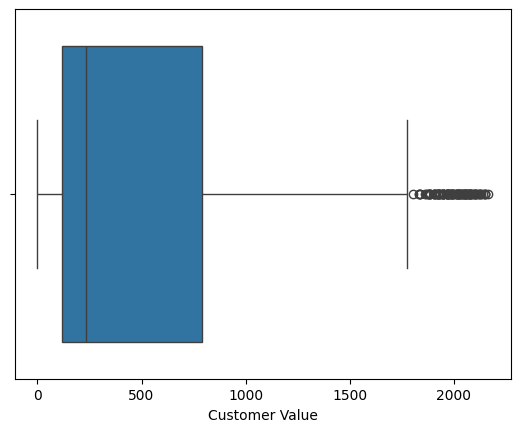

In [12]:
sns.boxplot(x='Customer Value', data=data)

In [13]:
q3 = data['Customer Value'].quantile(.75)
q1 = data['Customer Value'].quantile(.25)
iqr = q3-q1
iqr

np.float64(672.5524999999999)

<Axes: xlabel='Customer Value'>

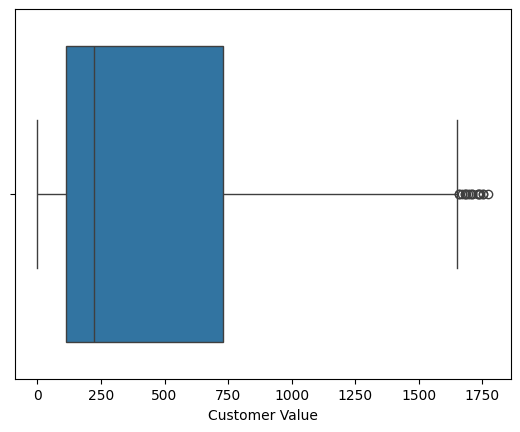

In [14]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Customer Value']>bottomrange) & (data['Customer Value']<upperrange)]
sns.boxplot(data=data,x='Customer Value')

<Axes: xlabel='Distinct Called Numbers'>

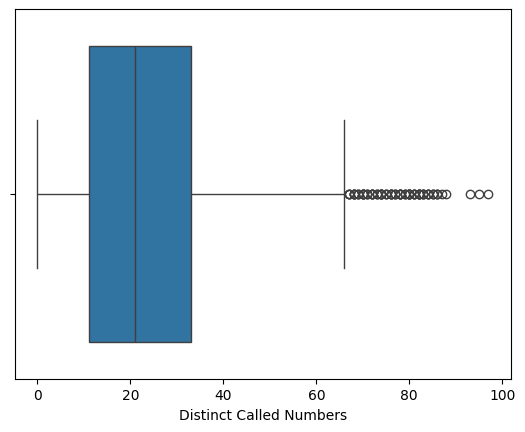

In [15]:
sns.boxplot(x='Distinct Called Numbers', data=data)

In [16]:
q3 = data['Distinct Called Numbers'].quantile(.75)
q1 = data['Distinct Called Numbers'].quantile(.25)
iqr = q3-q1
iqr

np.float64(22.0)

<Axes: xlabel='Distinct Called Numbers'>

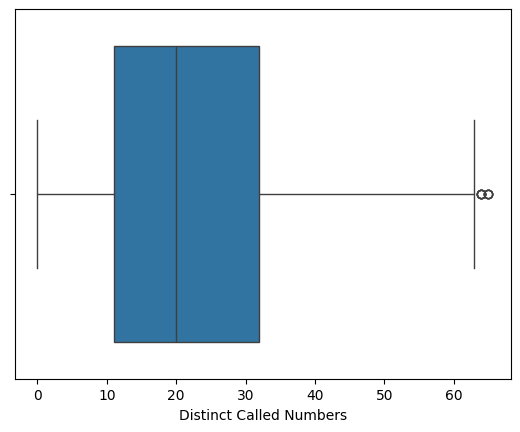

In [17]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Distinct Called Numbers']>bottomrange) & (data['Distinct Called Numbers']<upperrange)]
sns.boxplot(data=data,x='Distinct Called Numbers')

In [18]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3097,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3099,8,1,11,2,1792,25,7,9,3,1,1,30,100.680,1
3123,26,0,38,9,10740,99,8,44,5,2,1,55,174.585,0


In [19]:
data['Tariff Plan'].unique()

array([1, 2])

In [20]:
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000
mean,7.608532,0.084560,32.380521,0.942997,4294.354473,66.944885,61.921480,21.823707,2.836165,1.081540,1.258211,31.049453,414.402707,0.168365
std,7.009086,0.278279,8.931267,1.555178,3959.501220,52.953501,90.819988,14.034951,0.892418,0.273715,0.437733,8.847536,430.963271,0.374261
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1370.000000,28.000000,6.000000,11.000000,2.000000,1.000000,1.000000,25.000000,113.800000,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2948.000000,54.000000,21.000000,20.000000,3.000000,1.000000,1.000000,30.000000,220.840000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6255.000000,92.000000,73.000000,32.000000,3.000000,1.000000,2.000000,30.000000,706.635000,0.000000
max,36.000000,1.000000,47.000000,10.000000,16500.000000,242.000000,522.000000,65.000000,5.000000,2.000000,2.000000,55.000000,1773.440000,1.000000


# EDA(Expolatary Data Analysis)

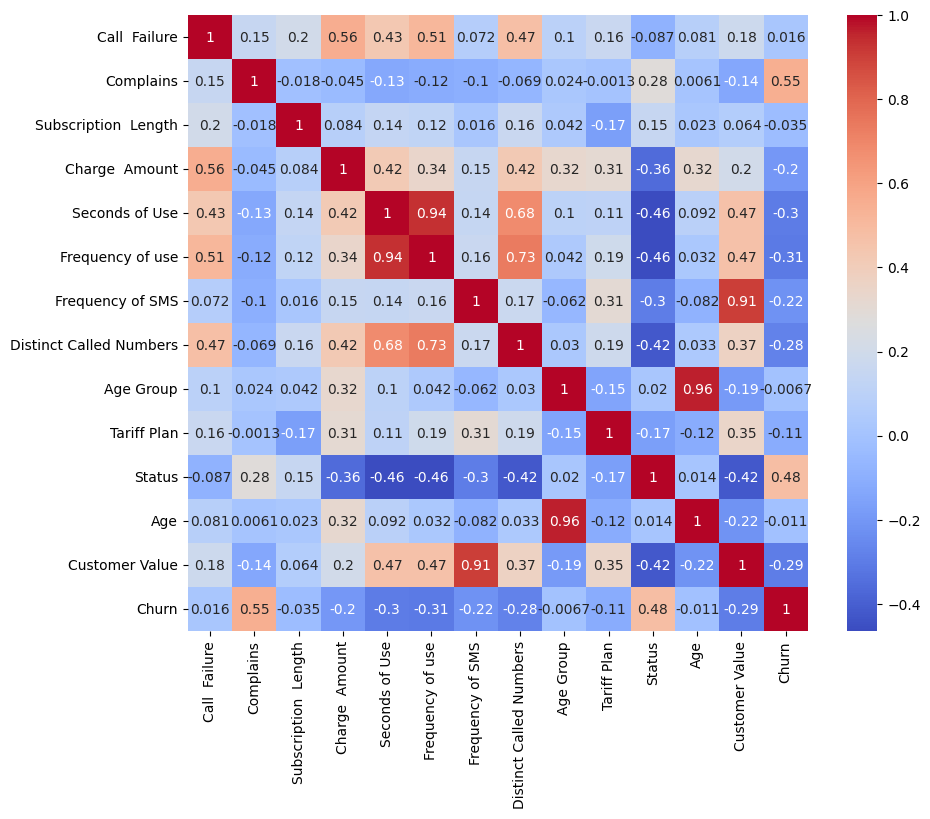

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

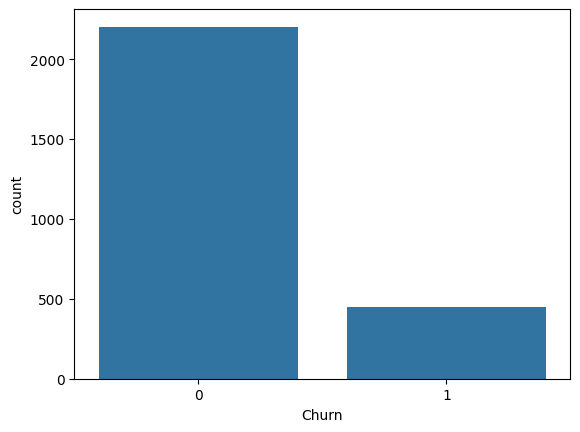

In [22]:
sns.countplot(x='Churn', data=data)
plt.show()

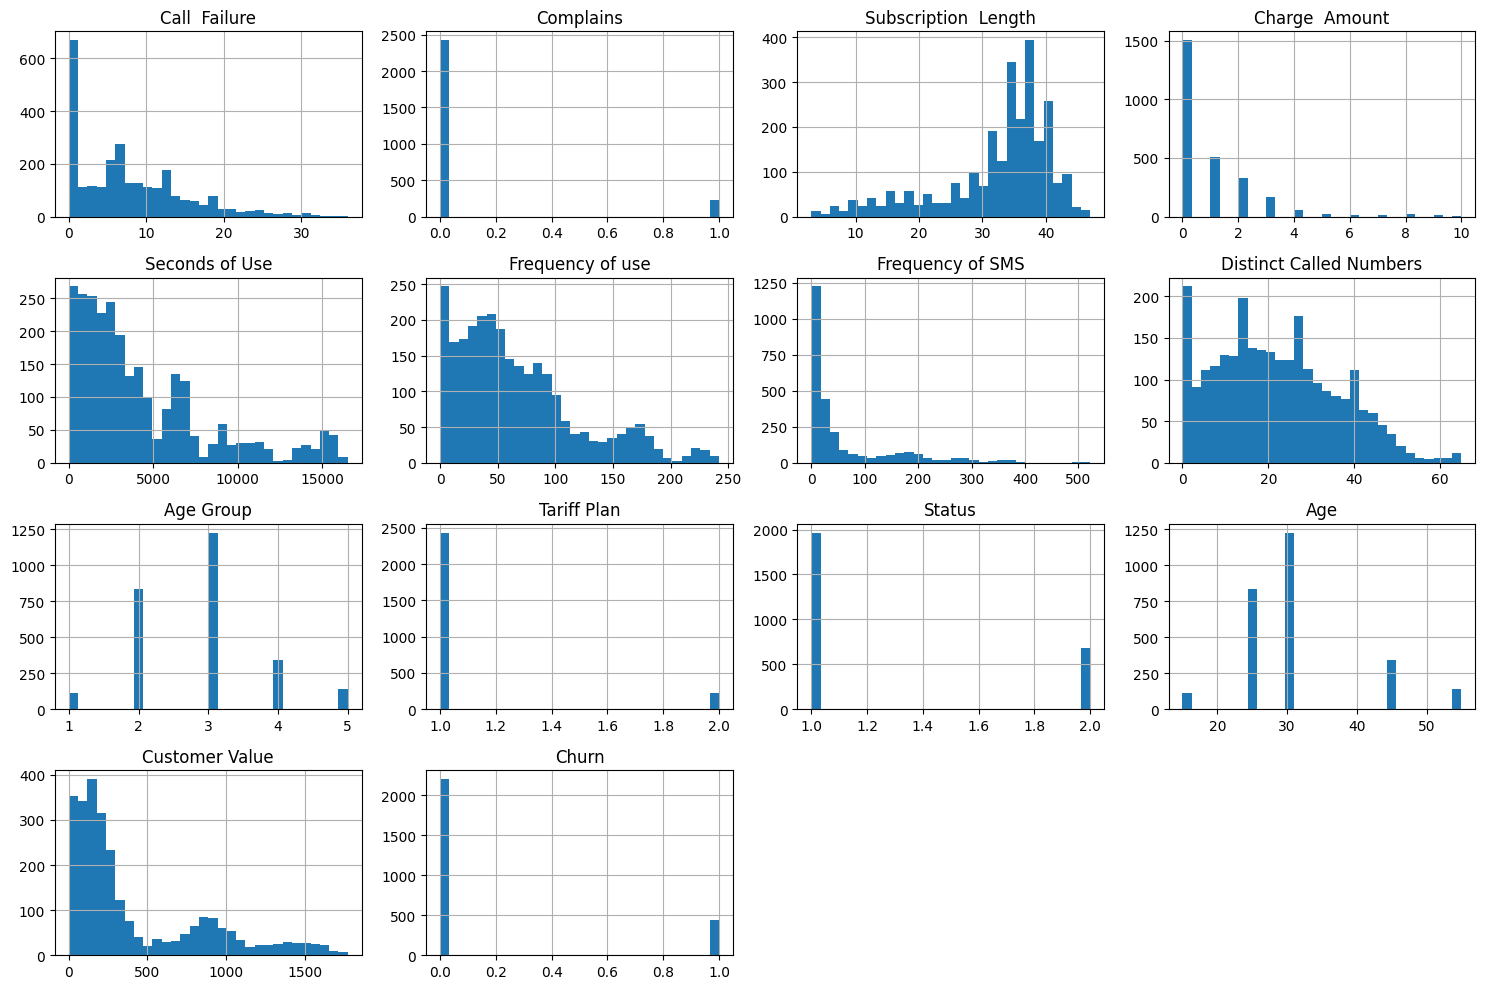

In [23]:
data.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

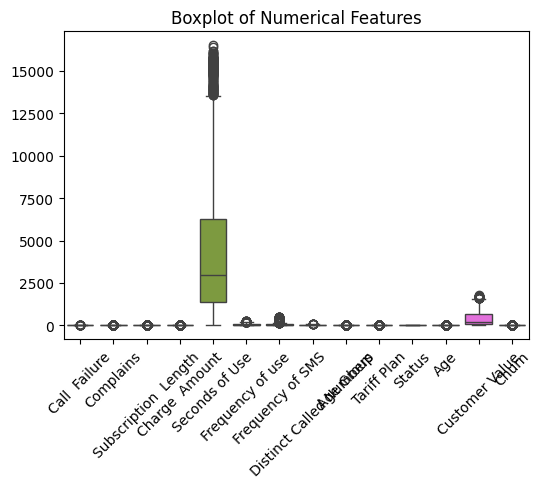

In [24]:
plt.figure(figsize=(6,4))
num_cols = data.select_dtypes(include=np.number).columns.tolist()
sns.boxplot(data=data[num_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

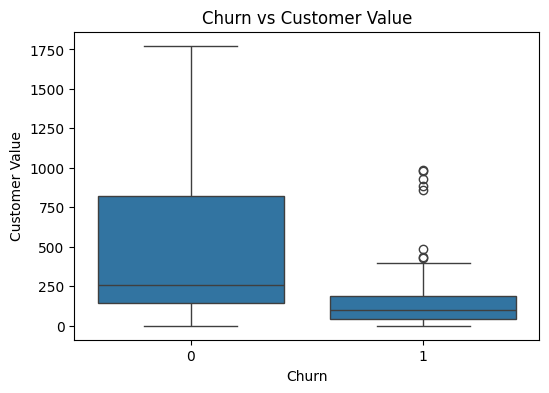

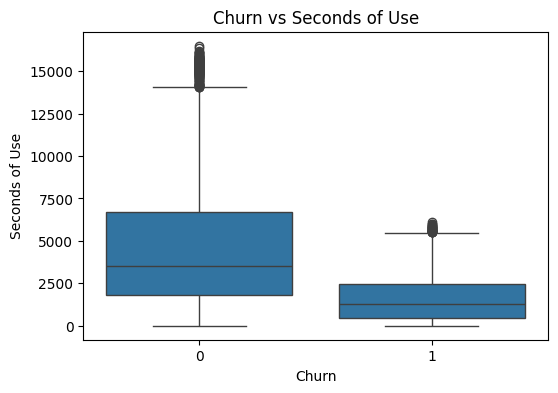

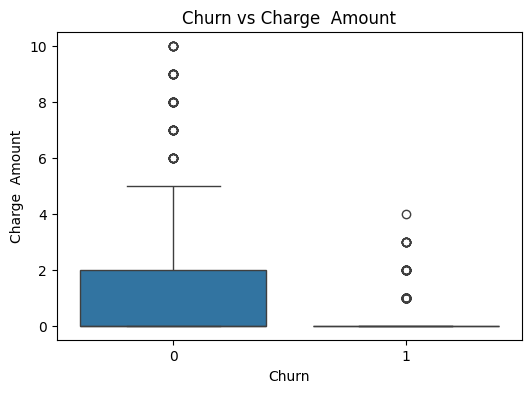

In [25]:
for col in ['Customer Value', 'Seconds of Use', 'Charge  Amount']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'Churn vs {col}')
    plt.show()

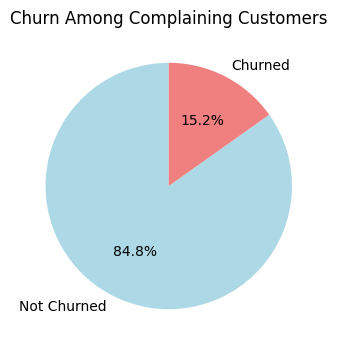

In [26]:
complain_churn = data[data['Complains'] > 0]['Churn'].value_counts()
plt.figure(figsize=(5,4))
plt.pie(complain_churn, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Churn Among Complaining Customers')
plt.show()

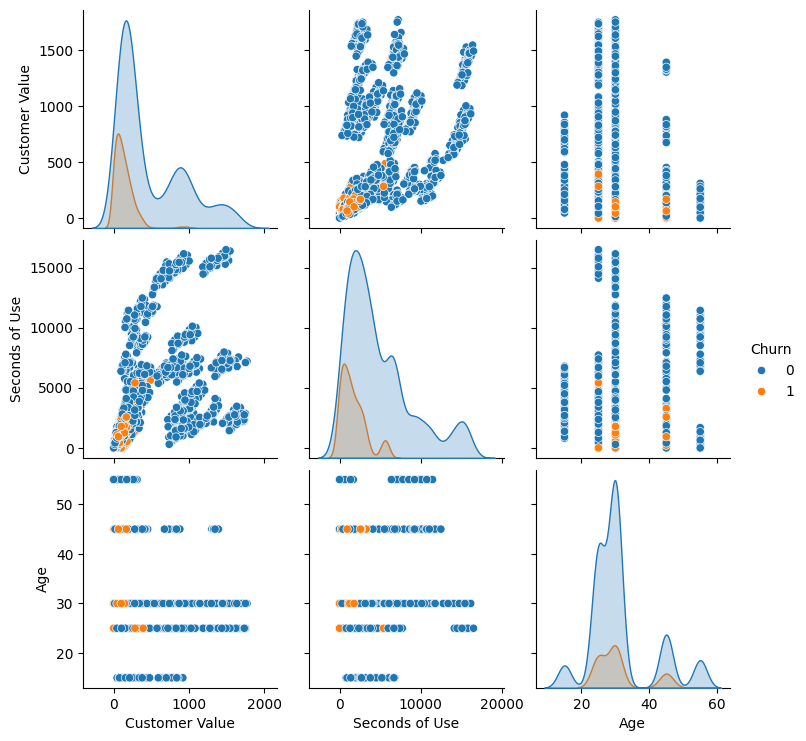

In [27]:
sns.pairplot(data, vars=['Customer Value', 'Seconds of Use', 'Age'], hue='Churn')
plt.show()

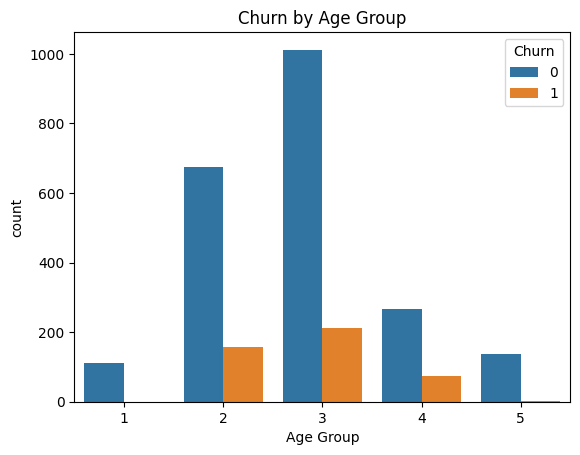

In [28]:
sns.countplot(x='Age Group', hue='Churn', data=data)
plt.title('Churn by Age Group')
plt.show()

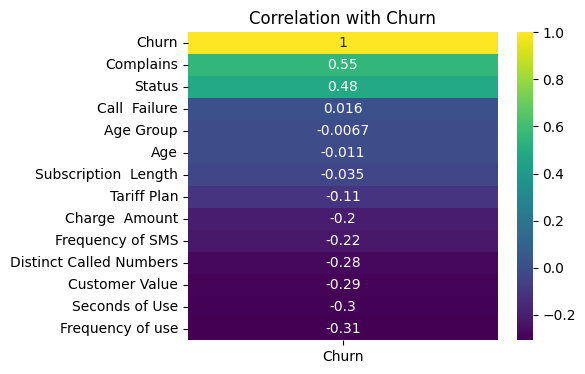

In [29]:
plt.figure(figsize=(5,4))
corr = data.corr()
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='viridis')
plt.title('Correlation with Churn')
plt.show()

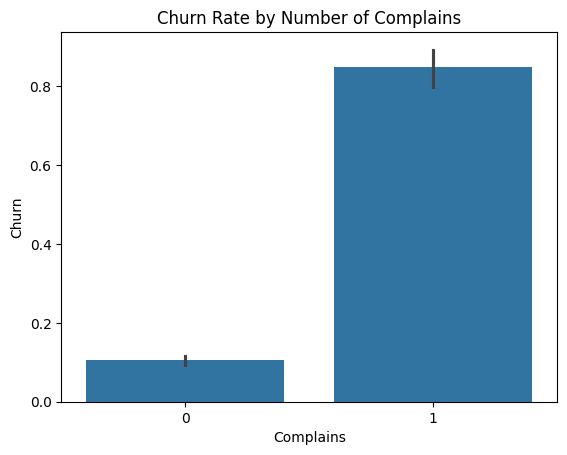

In [30]:
sns.barplot(x='Complains', y='Churn', data=data)
plt.title('Churn Rate by Number of Complains')
plt.show()

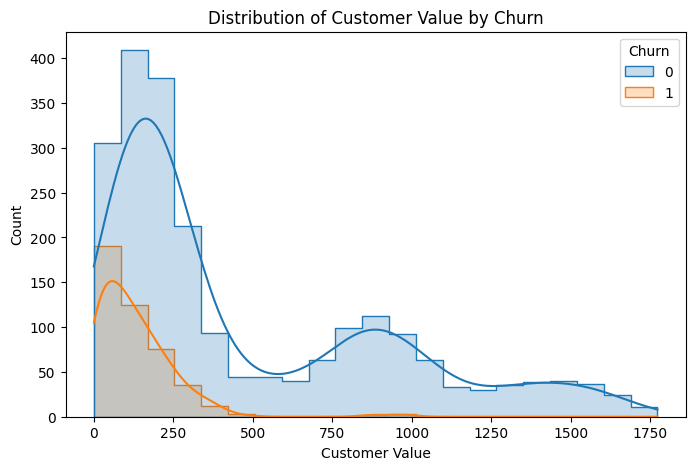

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Customer Value', hue='Churn', kde=True, element="step")
plt.title('Distribution of Customer Value by Churn')
plt.show()

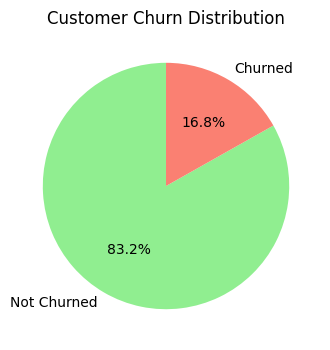

In [32]:
churn_counts = data['Churn'].value_counts()
plt.figure(figsize=(5,4))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Customer Churn Distribution')
plt.show()

In [33]:
data.drop('Age Group', axis=1, inplace=True)
data.drop('Age', axis=1, inplace=True)

# **logistic**

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [35]:
x = data.drop(['Churn'], axis=1)
y = data['Churn']

In [36]:
x

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Customer Value
0,8,0,38,0,4370,71,5,17,1,1,197.640
1,0,0,39,0,318,5,7,4,1,2,46.035
2,10,0,37,0,2453,60,359,24,1,1,1536.520
3,10,0,38,0,4198,66,1,35,1,1,240.020
4,3,0,38,0,2393,58,2,33,1,1,145.805
...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,1,1,261.210
3097,13,0,18,4,3157,51,38,21,1,1,280.320
3099,8,1,11,2,1792,25,7,9,1,1,100.680
3123,26,0,38,9,10740,99,8,44,2,1,174.585


In [37]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3096,0
3097,0
3099,1
3123,0


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, train_size=0.80, random_state = 42)

In [39]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)
print(predictions)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
z=confusion_matrix(y_test, predictions)
z

array([[433,  13],
       [ 65,  19]])

accuracy

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8528301886792453

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       446
           1       0.59      0.23      0.33        84

    accuracy                           0.85       530
   macro avg       0.73      0.60      0.62       530
weighted avg       0.83      0.85      0.82       530



# **KNN**

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
model = KNeighborsClassifier(n_neighbors=25)

In [46]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [47]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
# Ensure consistent train-test split before creating the DataFrame
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=46)

# Assuming 'model' is already trained on the consistent x_train and y_train
# If not, you need to retrain the model here:
model.fit(x_train.values, y_train.values)

y_pred = model.predict(x_test.values)
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

,Predicted,Actual
2795,0,0
107,0,0
1101,1,0
662,0,0
1388,0,0
...,...,...
172,0,1
3012,0,0
1165,0,0
2910,0,0


Evaluation Metric

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8327044025157233

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[638,  21],
       [112,  24]])

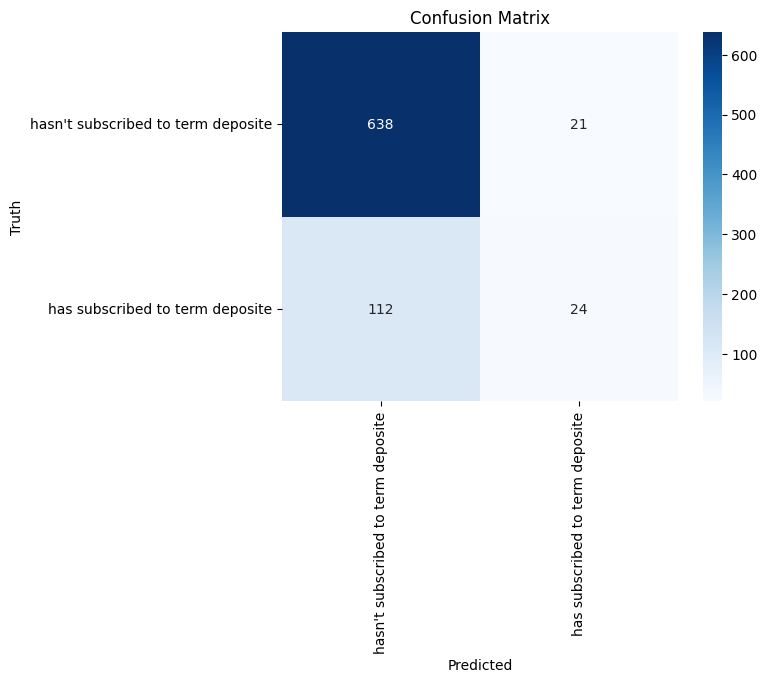

In [51]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite", "has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite", "has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [52]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       659
           1       0.53      0.18      0.27       136

    accuracy                           0.83       795
   macro avg       0.69      0.57      0.59       795
weighted avg       0.80      0.83      0.80       795



# SVM

In [53]:
from sklearn.svm import SVC

In [54]:
model = SVC(kernel='linear')

In [55]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [58]:
y_pred = model.predict(x_test)

In [59]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [60]:
svm = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
svm

,Predicted,Actual
2795,0,0
107,0,0
1101,0,0
662,0,0
1388,0,0
...,...,...
172,1,1
3012,0,0
1165,0,0
2910,0,0


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8905660377358491

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[653,   6],
       [ 81,  55]])

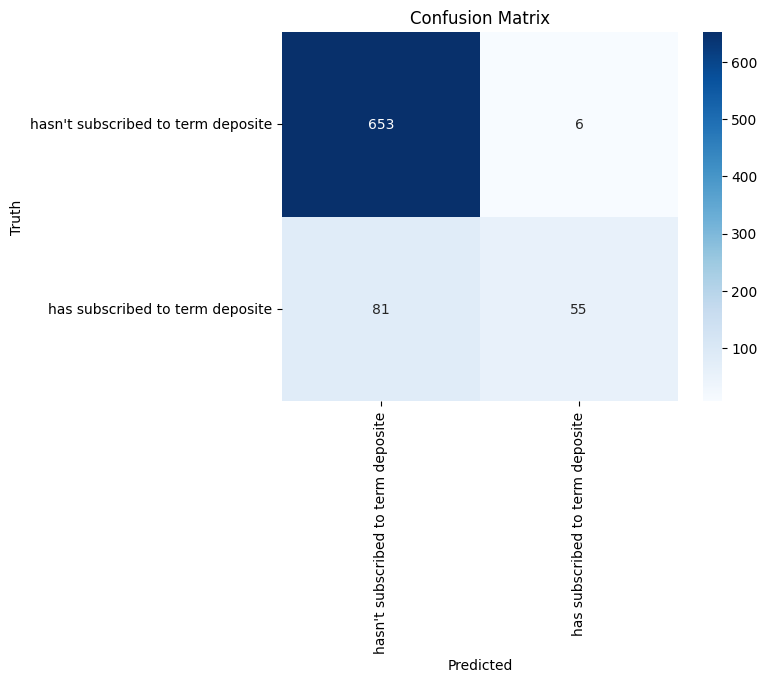

In [63]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# **DECISION TREE**

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=46)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=46)

In [65]:
y_pred_dt = dt_model.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.9245283018867925

In [67]:
from sklearn.metrics import confusion_matrix
# Ensure consistent train-test split before calculating confusion matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=46)
dt_model = DecisionTreeClassifier(random_state=46)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[631,  28],
       [ 34, 102]])

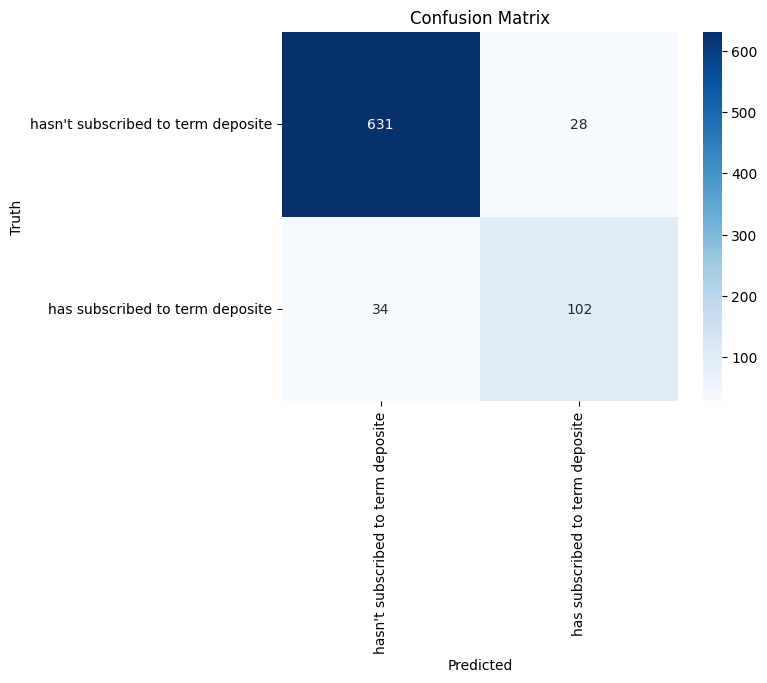

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [69]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred_dt)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       659
           1       0.78      0.75      0.77       136

    accuracy                           0.92       795
   macro avg       0.87      0.85      0.86       795
weighted avg       0.92      0.92      0.92       795



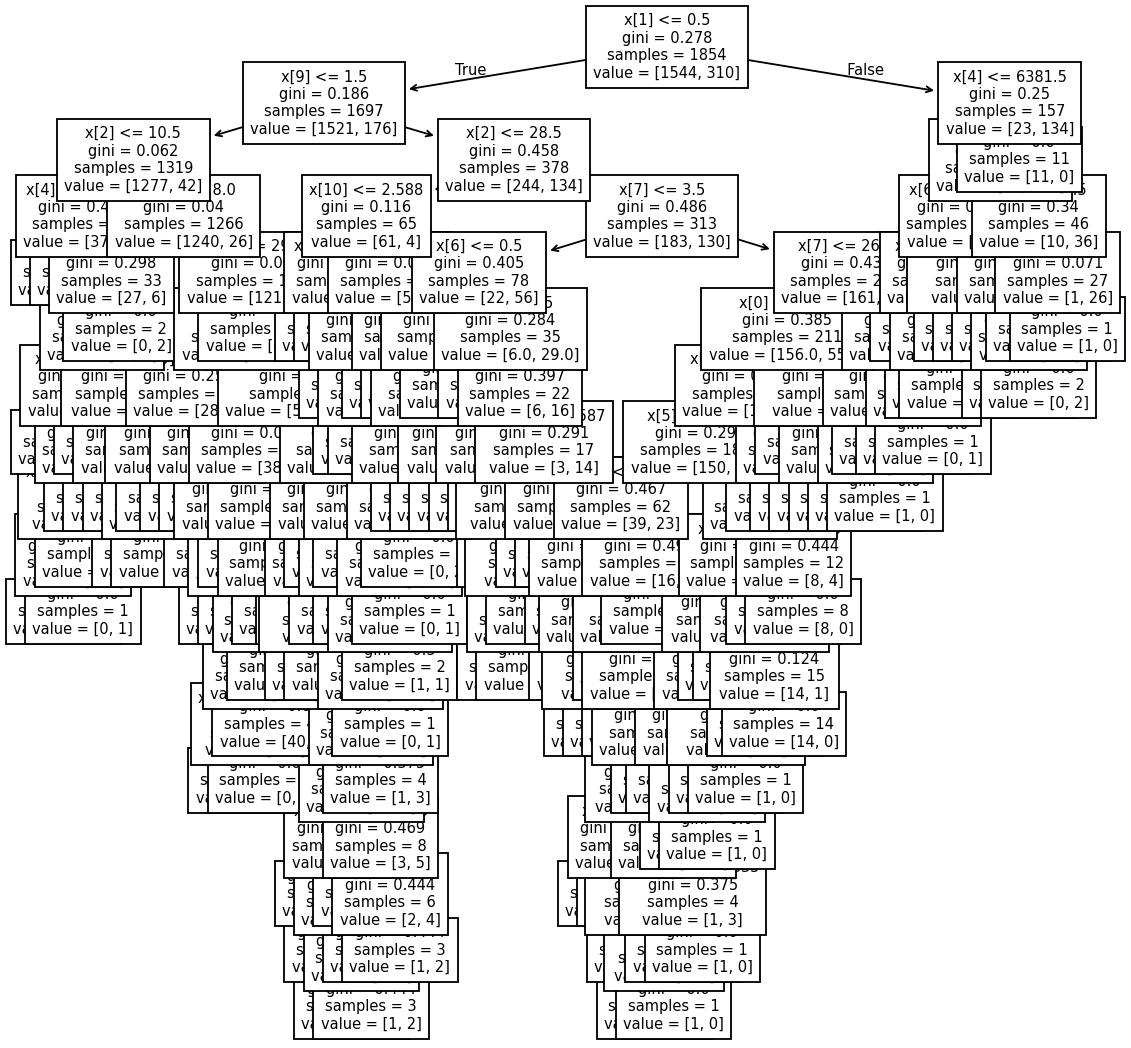

In [70]:
from sklearn.tree import plot_tree
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=46)
dt_model.fit(x_train, y_train)

plt.figure(figsize=(10, 10), dpi=132)
plot_tree(dt_model, fontsize=8)
plt.show()
#plt.savefig('out.pdf')

# **Decision Tree Classifier Parameter**

In [71]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3) # 'gini', 'log_loss', 'entropy'

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred_dt)

0.8918238993710692

In [73]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[653,   6],
       [ 80,  56]])

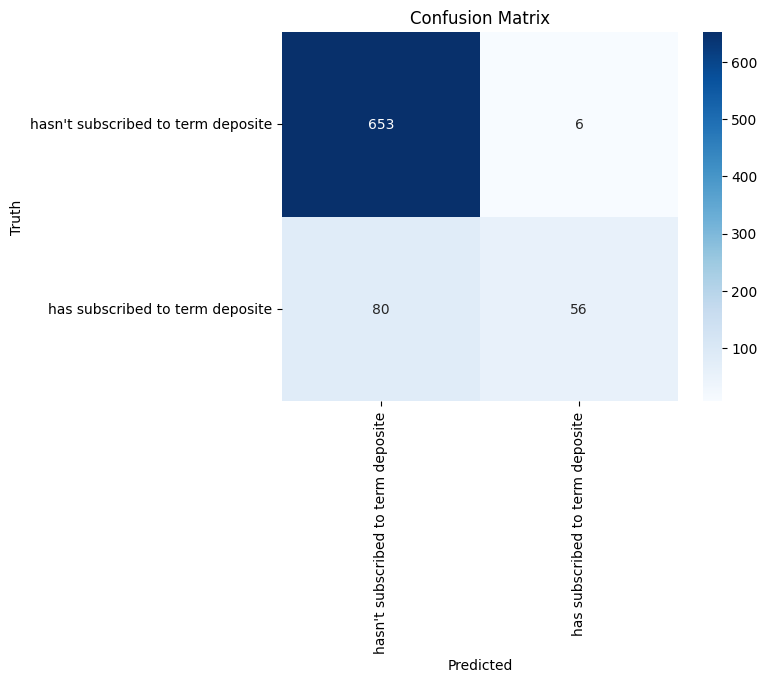

In [74]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [75]:
classification_rep = classification_report(y_test, y_pred_dt)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       659
           1       0.90      0.41      0.57       136

    accuracy                           0.89       795
   macro avg       0.90      0.70      0.75       795
weighted avg       0.89      0.89      0.87       795



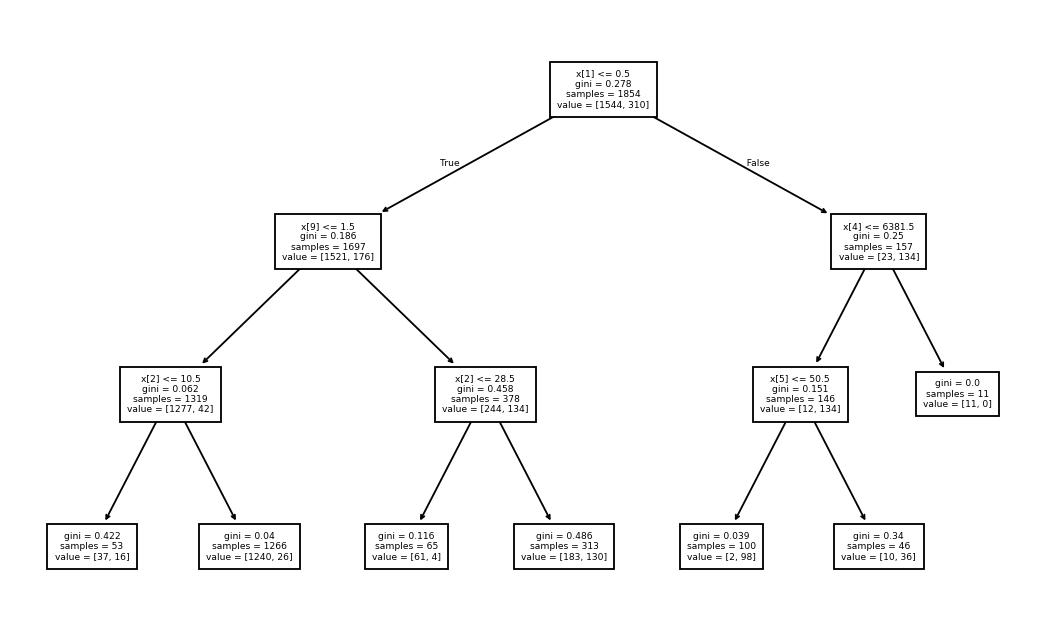

In [76]:
plt.figure(figsize=(10, 6), dpi=132)
plot_tree(clf, fontsize=5)
plt.show()

# **NAIVE BAYES**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [78]:
splits = [0.4, 0.3, 0.25, 0.2]   # 60-40, 70-30, 75-25, 80-20
results = []


In [79]:
# Re-define x and y before the loop
data = pd.read_csv('/content/Customer Churn.csv')
x = data.drop(['Churn'], axis=1)
y = data['Churn']

for test_size in splits:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=42, stratify=y
    )
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([f"{int((1-test_size)*100)}-{int(test_size*100)}", acc])

  Train-Test Split  Accuracy
0            60-40  0.723810
1            70-30  0.732275
2            75-25  0.737310
3            80-20  0.734921


/tmp/ipython-input-4181705986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Train-Test Split", y="Accuracy", data=results_df, palette="Blues")


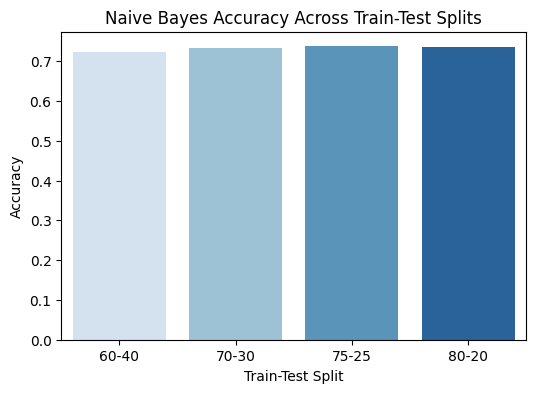

In [80]:
results_df = pd.DataFrame(results, columns=["Train-Test Split", "Accuracy"])
print(results_df)

# 6. Plot
plt.figure(figsize=(6,4))
sns.barplot(x="Train-Test Split", y="Accuracy", data=results_df, palette="Blues")
plt.title("Naive Bayes Accuracy Across Train-Test Splits")
plt.ylabel("Accuracy")
plt.xlabel("Train-Test Split")
plt.show()

# **RANDOM FOREST**

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier()

In [83]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
y_pred = model.predict(x_test)

In [85]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [86]:
df = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
df

,Predicted,Actual
3036,0,0
1783,0,0
2539,0,0
1807,0,0
3020,0,0
...,...,...
121,0,0
3130,0,0
2652,0,0
625,0,0


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9571428571428572

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[521,  10],
       [ 17,  82]])

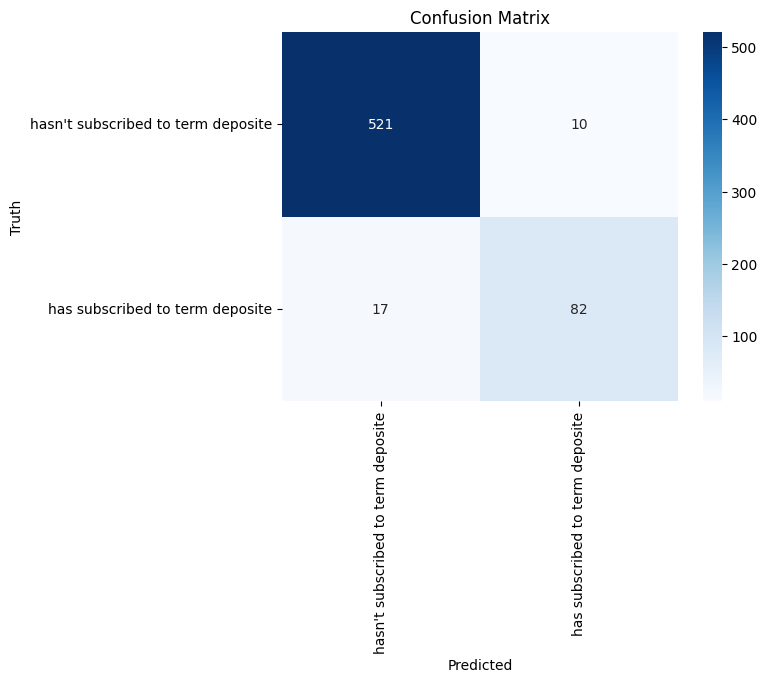

In [89]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [90]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.89      0.83      0.86        99

    accuracy                           0.96       630
   macro avg       0.93      0.90      0.92       630
weighted avg       0.96      0.96      0.96       630



# **random classifier parameter**

In [91]:
# Create Random Forest Classifier object
clf = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=10, bootstrap=True) # 'gini', 'log_loss', 'entropy'

# Train Random Forest Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

0.9650793650793651

In [93]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[521,  10],
       [ 12,  87]])

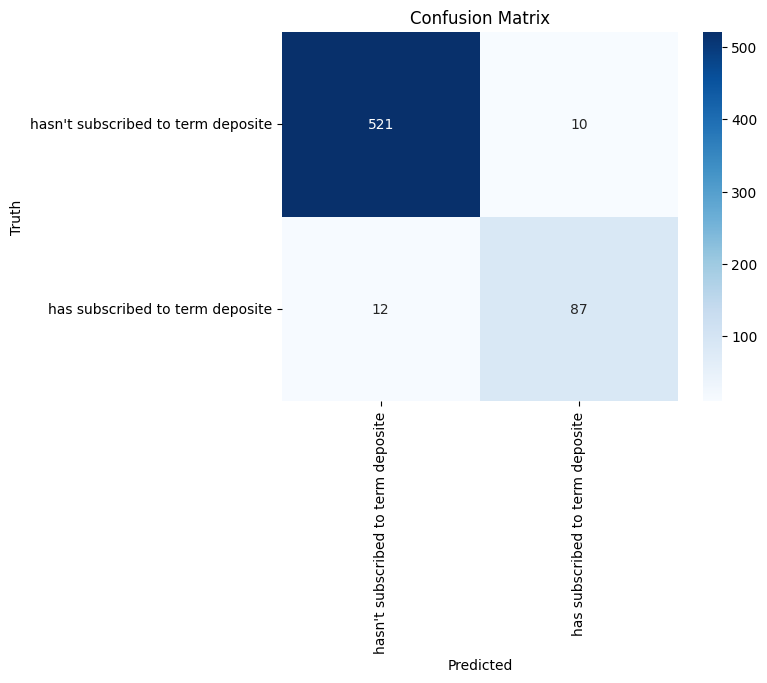

In [94]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [95]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.90      0.88      0.89        99

    accuracy                           0.97       630
   macro avg       0.94      0.93      0.93       630
weighted avg       0.96      0.97      0.96       630



# **BOOSTING**

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
model = AdaBoostClassifier()

In [98]:
model.fit(x_train, y_train)

AdaBoostClassifier()

In [99]:
y_pred = model.predict(x_test)

In [100]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [101]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
3036,0,0
1783,0,0
2539,0,0
1807,0,0
3020,0,0
...,...,...
121,0,0
3130,0,0
2652,0,0
625,0,0


In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9206349206349206

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[520,  11],
       [ 39,  60]])

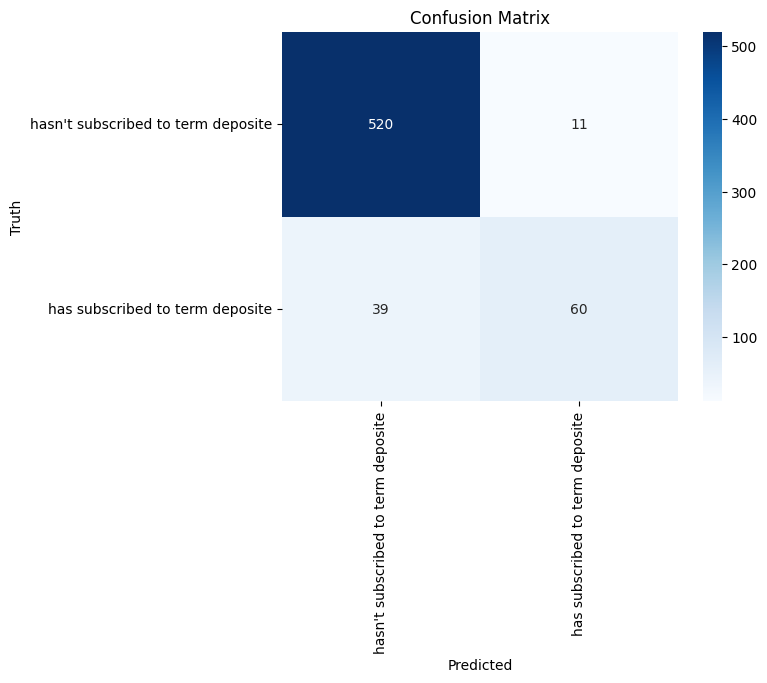

In [104]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [105]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       531
           1       0.85      0.61      0.71        99

    accuracy                           0.92       630
   macro avg       0.89      0.79      0.83       630
weighted avg       0.92      0.92      0.92       630



# **GARDIENT BOOSTING CLASSIFIER**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
model = GradientBoostingClassifier()

In [108]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [109]:
y_pred = model.predict(x_test)

In [110]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [111]:
df= pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
df

,Predicted,Actual
3036,0,0
1783,0,0
2539,0,0
1807,0,0
3020,0,0
...,...,...
121,0,0
3130,0,0
2652,0,0
625,0,0


In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9476190476190476

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[520,  11],
       [ 22,  77]])

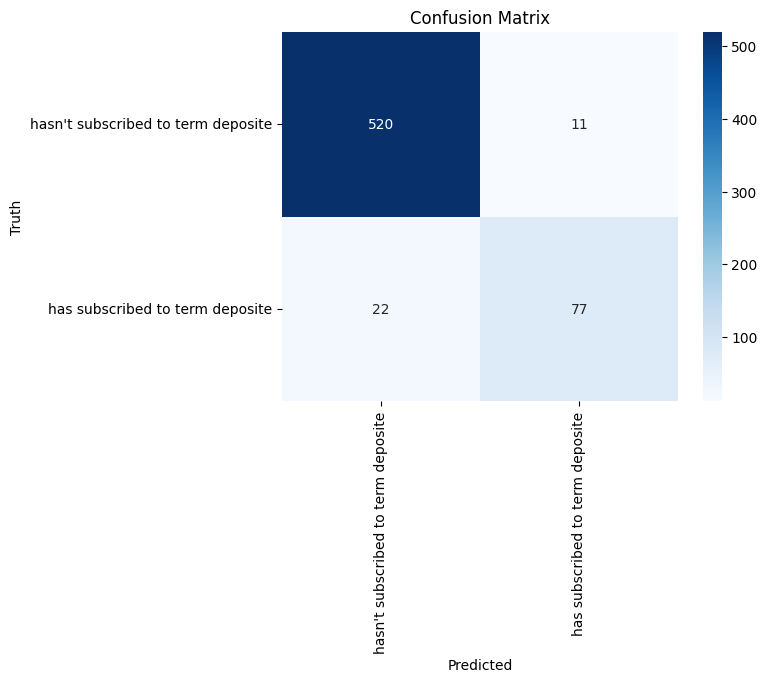

In [114]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [115]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.88      0.78      0.82        99

    accuracy                           0.95       630
   macro avg       0.92      0.88      0.90       630
weighted avg       0.95      0.95      0.95       630



# **Gardient boosting classifier parameter**

In [116]:
# Create Boosting Classifier object
br = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss='exponential', criterion='squared_error') #'exponential', 'log_loss'

# Train Boosting Classifier
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [117]:
accuracy_score(y_test,y_pred)

0.946031746031746

# **XG_BOOSTING**

In [118]:
from xgboost import XGBClassifier

In [119]:
model = XGBClassifier()

In [120]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [121]:
y_pred = model.predict(x_test)

In [122]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [123]:
df = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
df

,Predicted,Actual
3036,0,0
1783,0,0
2539,0,0
1807,0,0
3020,0,0
...,...,...
121,0,0
3130,0,0
2652,0,0
625,0,0


In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[521,  10],
       [ 11,  88]])

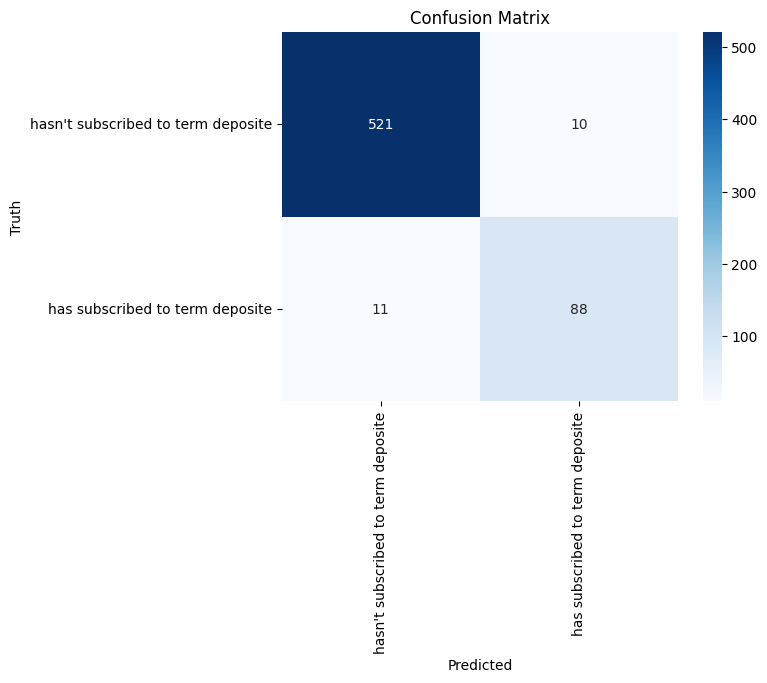

In [126]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [127]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.90      0.89      0.89        99

    accuracy                           0.97       630
   macro avg       0.94      0.94      0.94       630
weighted avg       0.97      0.97      0.97       630



# **XGBoosting Classifier Parameter**

In [128]:
# Create Boosting Classifier object
br = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Classifier
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [129]:
accuracy_score(y_test,y_pred)

0.973015873015873

# **BAGGING**

In [130]:
from sklearn.ensemble import BaggingClassifier

In [131]:
model = BaggingClassifier()

In [132]:
model.fit(x_train, y_train)

BaggingClassifier()

In [133]:
y_pred = model.predict(x_test)

In [134]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [135]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
3036,0,0
1783,0,0
2539,0,0
1807,0,0
3020,0,0
...,...,...
121,0,0
3130,0,0
2652,0,0
625,0,0


In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9555555555555556

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[522,   9],
       [ 19,  80]])

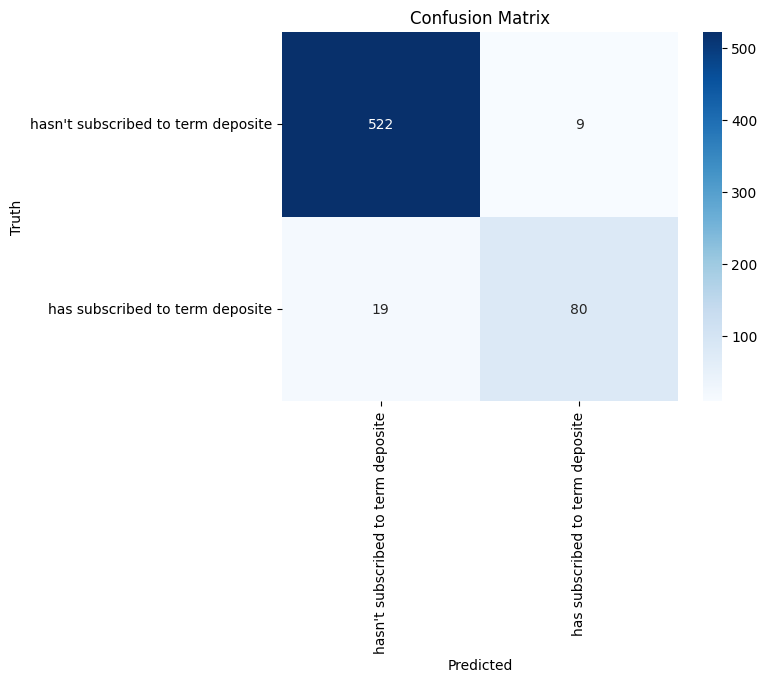

In [138]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [139]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.90      0.81      0.85        99

    accuracy                           0.96       630
   macro avg       0.93      0.90      0.91       630
weighted avg       0.95      0.96      0.95       630



# **Bagging Classifier Parameter**

In [140]:
# Create Bagging Classifier object
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=32)
br = BaggingClassifier(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Classifier
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [141]:
accuracy_score(y_test,y_pred)

0.9015873015873016

In [142]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[531,   0],
       [ 62,  37]])

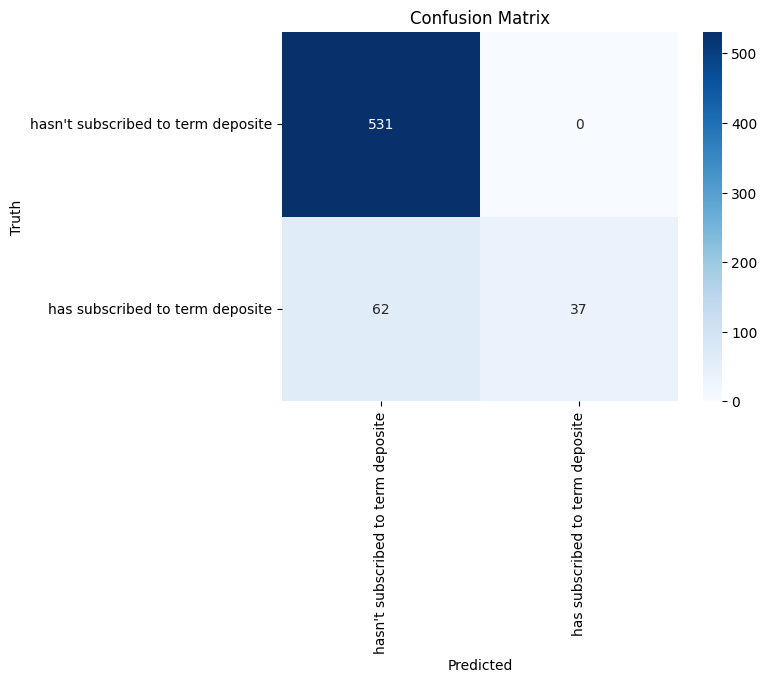

In [143]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"], yticklabels=["hasn't subscribed to term deposite","has subscribed to term deposite"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [144]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       531
           1       1.00      0.37      0.54        99

    accuracy                           0.90       630
   macro avg       0.95      0.69      0.74       630
weighted avg       0.91      0.90      0.88       630



# **VIF**

In [145]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

In [146]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [147]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [148]:
vif_data

,feature,VIF
0,Call Failure,6.147979
1,Complains,1.249283
2,Subscription Length,15.219720
3,Charge Amount,4.266890
4,Seconds of Use,48.497364
5,Frequency of use,46.419571
6,Frequency of SMS,58.265820
7,Distinct Called Numbers,7.010235
8,Age Group,156.281354
9,Tariff Plan,19.665315


In [149]:
x = data.drop(['Age','Age Group'], axis=1)

In [150]:
x

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,1,1,197.640,0
1,0,0,39,0,318,5,7,4,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,1,721.980,0
3146,17,0,17,1,9237,177,80,42,1,1,261.210,0
3147,13,0,18,4,3157,51,38,21,1,1,280.320,0
3148,7,0,11,2,4695,46,222,12,1,1,1077.640,0


In [151]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [152]:
vif_data

,feature,VIF
0,Call Failure,6.073572
1,Complains,1.575247
2,Subscription Length,13.762116
3,Charge Amount,4.246662
4,Seconds of Use,40.152099
5,Frequency of use,46.357403
6,Frequency of SMS,34.107785
7,Distinct Called Numbers,6.683968
8,Tariff Plan,15.416854
9,Status,15.566235


In [153]:
# VIF Calculation for Churn Dataset
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
# Example: df = pd.read_csv("customer_churn.csv")

# Drop target column (Churn)
X = data.drop("Churn", axis=1)

# Add constant for VIF calculation
X_const = sm.add_constant(X)

# Create a dataframe to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("Variance Inflation Factor (VIF) Table:")
print(vif_data)

Variance Inflation Factor (VIF) Table:
                    Feature        VIF
0                     const  79.707706
1             Call  Failure   2.924264
2                 Complains   1.157264
3      Subscription  Length   1.182062
4            Charge  Amount   3.189919
5            Seconds of Use  22.779944
6          Frequency of use  18.882664
7          Frequency of SMS  43.486055
8   Distinct Called Numbers   2.474734
9                 Age Group  14.171153
10              Tariff Plan   1.595108
11                   Status   1.850072
12                      Age  14.853635
13           Customer Value  55.771092


In [154]:
vif_data

,Feature,VIF
0,const,79.707706
1,Call Failure,2.924264
2,Complains,1.157264
3,Subscription Length,1.182062
4,Charge Amount,3.189919
5,Seconds of Use,22.779944
6,Frequency of use,18.882664
7,Frequency of SMS,43.486055
8,Distinct Called Numbers,2.474734
9,Age Group,14.171153


# **ANN**

In [155]:
import tensorflow as tf

In [156]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 10, verbose=0)

In [157]:
model.evaluate(x_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1413 - loss: 13.6907 - precision: 0.1420 - recall: 0.9594  


[13.462737083435059,
 0.15555556118488312,
 0.1558028608560562,
 0.9898989796638489]

In [158]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791 (3.09 KB)

 Trainable params: 263 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 528 (2.07 KB)

Text(0.5, 0, 'epochs')

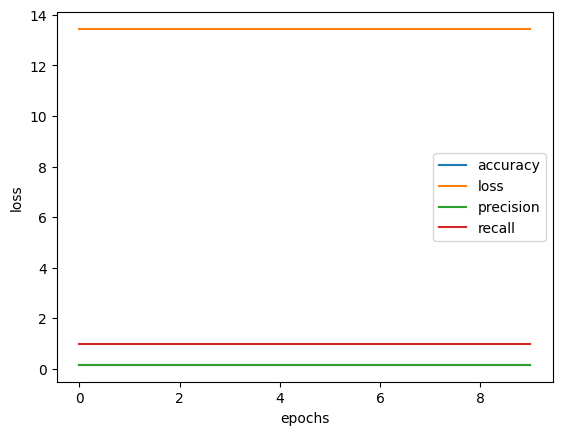

In [159]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [160]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.40, random_state=46)

In [161]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(15, activation='tanh' ),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 150)

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2972 - loss: 0.7730 - precision: 0.1729 - recall: 0.8517
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.5297 - precision: 0.5724 - recall: 0.1478
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.4545 - precision: 0.4189 - recall: 0.0660
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8379 - loss: 0.4325 - precision: 0.4436 - recall: 0.0711
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8482 - loss: 0.4255 - precision: 0.6686 - recall: 0.1480
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8485 - loss: 0.4239 - precision: 0.6741 - recall: 0.1480
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.4269 - precision: 0.7076 - recall: 0.1459
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8514 - loss: 0.4225 - precision: 0.7329 - recall: 0.1463
Epoch 9/150
60/60 ━━━━━━

In [162]:
model.evaluate(x_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.2703 - precision: 0.9512 - recall: 0.1430


[0.25740084052085876, 0.8809523582458496, 1.0, 0.20212766528129578]

In [163]:
model.summary();

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 935 (3.66 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 624 (2.44 KB)

Text(0.5, 0, 'epochs')

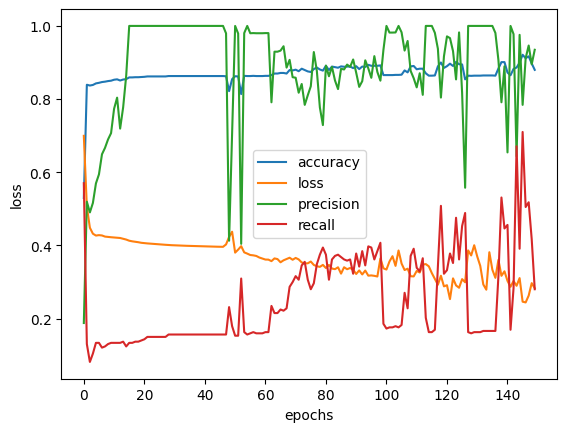

In [164]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [165]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(15, activation='relu'),
                            tf.keras.layers.Dense(10, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2278 - loss: 1.0607 - precision: 0.1548 - recall: 0.8341
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4180 - loss: 0.6908 - precision: 0.1599 - recall: 0.5848
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8360 - loss: 0.5550 - precision: 0.0246 - recall: 1.6020e-04    
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4846 - precision: 0.0492 - recall: 1.6020e-04    
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.4478 - precision: 0.6557 - recall: 0.0034
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.4324 - precision: 0.6557 - recall: 0.0034
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8371 - loss: 0.4220 - precision: 0.6557 - recall: 0.0053
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8579 - loss: 0.4140 - precision: 0.8888 - recall: 0.1477
Epoch 9/

In [166]:
model.evaluate(x_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3619 - precision: 0.9255 - recall: 0.1320


[0.34135961532592773,
 0.8777777552604675,
 0.9473684430122375,
 0.19148936867713928]

In [167]:
model.summary();

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 15)             │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,100 (4.30 KB)

 Trainable params: 366 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 734 (2.87 KB)

Text(0.5, 0, 'epochs')

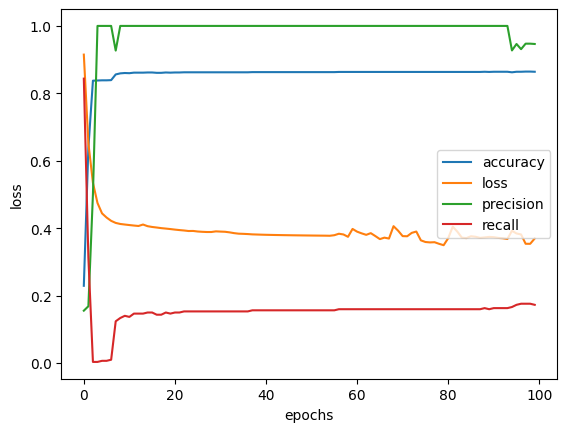

In [168]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [169]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='tanh'),
                            tf.keras.layers.Dense(15, activation='softmax'),
                            tf.keras.layers.Dense(10, activation='tanh'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8362 - loss: 0.6106 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4562 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4358 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4283 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8378 - loss: 0.4249 - precision: 0.3807 - recall: 0.0286
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4226 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4172 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4166 - precision: 

In [170]:
model.evaluate(x_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.3439 - precision: 0.5778 - recall: 0.3556          


[0.3202614188194275, 0.8730158805847168, 0.60447758436203, 0.4308510720729828]

In [171]:
model.summary();

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,640 (18.13 KB)

 Trainable params: 1,546 (6.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,094 (12.09 KB)

Text(0.5, 0, 'epochs')

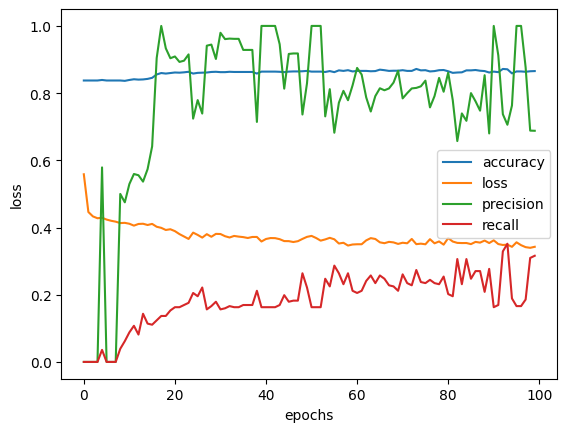

In [172]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [173]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='tanh'),
                            tf.keras.layers.Dense(15, activation='softmax'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8362 - loss: 0.6360 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.5339 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4816 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4555 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4431 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4373 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4346 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4333 - pre

In [174]:

model.evaluate(x_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8485 - loss: 0.4132 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.40165919065475464, 0.8507936596870422, 0.0, 0.0]

In [175]:
model.summary();

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,824 (11.04 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,413 (5.52 KB)

Text(0.5, 0, 'epochs')

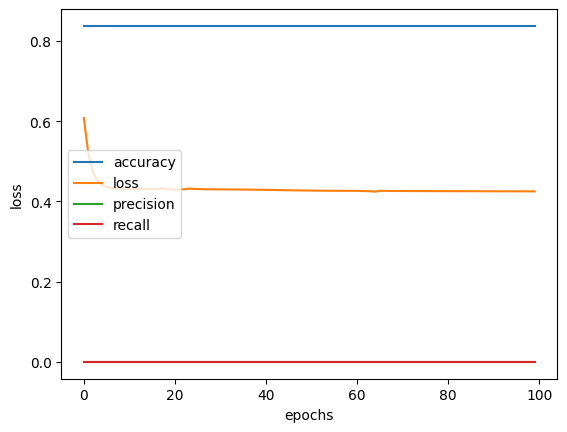

In [176]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [177]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='tanh'),
                            tf.keras.layers.Dense(15, activation='softmax'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8329 - loss: 0.6038 - precision: 0.2527 - recall: 0.0099
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4444 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4379 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4365 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4351 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4334 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4313 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4309 - precision: 0.0000e+

In [178]:
model.evaluate(x_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8480 - loss: 0.4131 - precision: 0.4676 - recall: 0.1021          


[0.40100347995758057,
 0.8539682626724243,
 0.5357142686843872,
 0.1595744639635086]

In [179]:
model.summary();

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,684 (10.49 KB)

 Trainable params: 1,341 (5.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,343 (5.25 KB)

Text(0.5, 0, 'epochs')

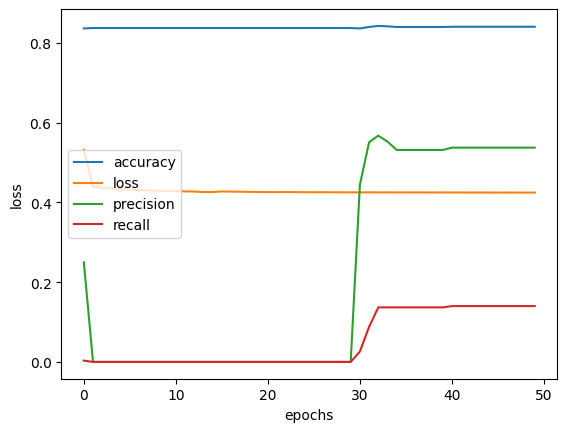

In [180]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [181]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='tanh'),
                            tf.keras.layers.Dense(15, activation='softmax'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adamax(learning_rate=0.0005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 250)

Epoch 1/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1639 - loss: 0.7491 - precision: 0.1638 - recall: 1.0000
Epoch 2/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3398 - loss: 0.6995 - precision: 0.1539 - recall: 0.6818
Epoch 3/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.6650 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.6379 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.6128 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.5910 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.5739 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.5601 - precision: 0.0000e+

In [182]:
model.evaluate(x_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8789 - loss: 0.3509 - precision: 0.9512 - recall: 0.2025          


[0.3273037075996399, 0.8952381014823914, 1.0, 0.2978723347187042]

In [183]:
model.summary();

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,025 (15.73 KB)

 Trainable params: 1,341 (5.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,684 (10.49 KB)

Text(0.5, 0, 'epochs')

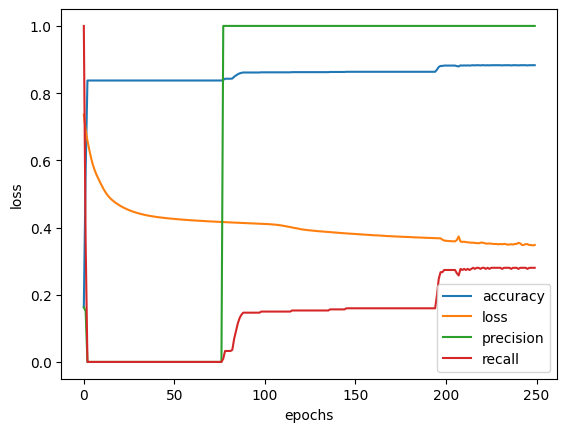

In [184]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(C=1e9),
    "KNN": KNeighborsClassifier(n_neighbors=25),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(random_state=46),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3, random_state=32), n_estimators=20, bootstrap=True)
}

for ratio in [0.2, 0.25, 0.3, 0.4]:   # 80-20, 75-25, 70-30, 60-40
    print(f"\n============================")
    print(f"Train-Test Split: {int((1-ratio)*100)}-{int(ratio*100)}")
    print("============================")

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=ratio, random_state=42, stratify=y
    )

    # Scale the data for models that require it
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for name, model in models.items():
        # Apply scaling only to models that benefit from it
        if name in ["Logistic Regression", "KNN", "SVM", "ANN"]:
          model.fit(x_train_scaled, y_train)
          y_pred = model.predict(x_test_scaled)
        else:
          model.fit(x_train, y_train)
          y_pred = model.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")


Train-Test Split: 80-20
Logistic Regression Accuracy: 0.8905
KNN Accuracy: 0.9333
SVM Accuracy: 0.8984
Decision Tree Accuracy: 0.9286
Random Forest Accuracy: 0.9619
AdaBoost Accuracy: 0.9206
Gradient Boosting Accuracy: 0.9476
XGBoost Accuracy: 0.9667
Bagging Accuracy: 0.9016

Train-Test Split: 75-25
Logistic Regression Accuracy: 0.8883
KNN Accuracy: 0.9302
SVM Accuracy: 0.8896
Decision Tree Accuracy: 0.9467
Random Forest Accuracy: 0.9556
AdaBoost Accuracy: 0.9074
Gradient Boosting Accuracy: 0.9391
XGBoost Accuracy: 0.9670
Bagging Accuracy: 0.8934

Train-Test Split: 70-30
Logistic Regression Accuracy: 0.8889
KNN Accuracy: 0.9302
SVM Accuracy: 0.8910
Decision Tree Accuracy: 0.9481
Random Forest Accuracy: 0.9587
AdaBoost Accuracy: 0.8931
Gradient Boosting Accuracy: 0.9471
XGBoost Accuracy: 0.9661
Bagging Accuracy: 0.9016

Train-Test Split: 60-40
Logistic Regression Accuracy: 0.8873
KNN Accuracy: 0.9230
SVM Accuracy: 0.8905
Decision Tree Accuracy: 0.9389
Random Forest Accuracy: 0.9563
Ada